In [1]:
# Bank Customer Churn Prediction

In [3]:
# Problem Statement & Dataset : https://www.kaggle.com/shrutimechlearn/churn-modelling

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("./Churn_Modelling.csv")

In [6]:
df.shape

(10000, 14)

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
# Exploratory Data Analysis

In [15]:
# Keep only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

In [31]:
# Generate correlation matrix
plt.figure(figsize=(200,120))
corr = numeric_df.corr()

<Figure size 20000x12000 with 0 Axes>

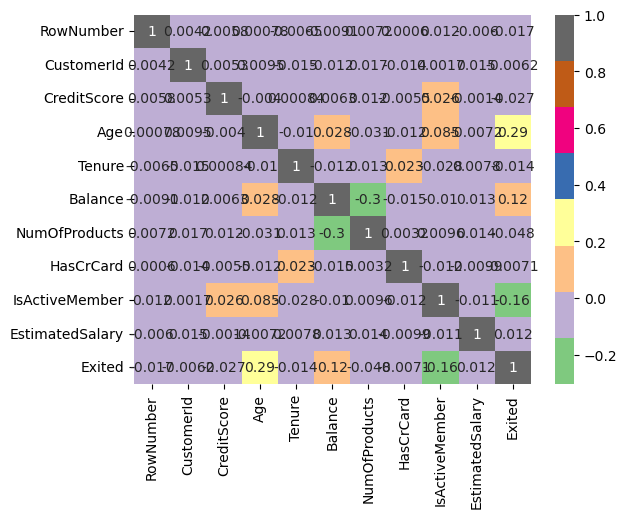

In [32]:
# Create the heatmap
sns.heatmap(corr, annot=True, cmap="Accent")
plt.show()

In [25]:
features = corr['Exited'].sort_values(ascending=False)[1:]

In [26]:
features.index

Index(['Age', 'Balance', 'EstimatedSalary', 'CustomerId', 'HasCrCard',
       'Tenure', 'RowNumber', 'CreditScore', 'NumOfProducts',
       'IsActiveMember'],
      dtype='object')

In [27]:
features.values

array([ 0.28532304,  0.11853277,  0.01209686, -0.00624799, -0.00713777,
       -0.01400061, -0.01657137, -0.02709354, -0.04781986, -0.15612828])

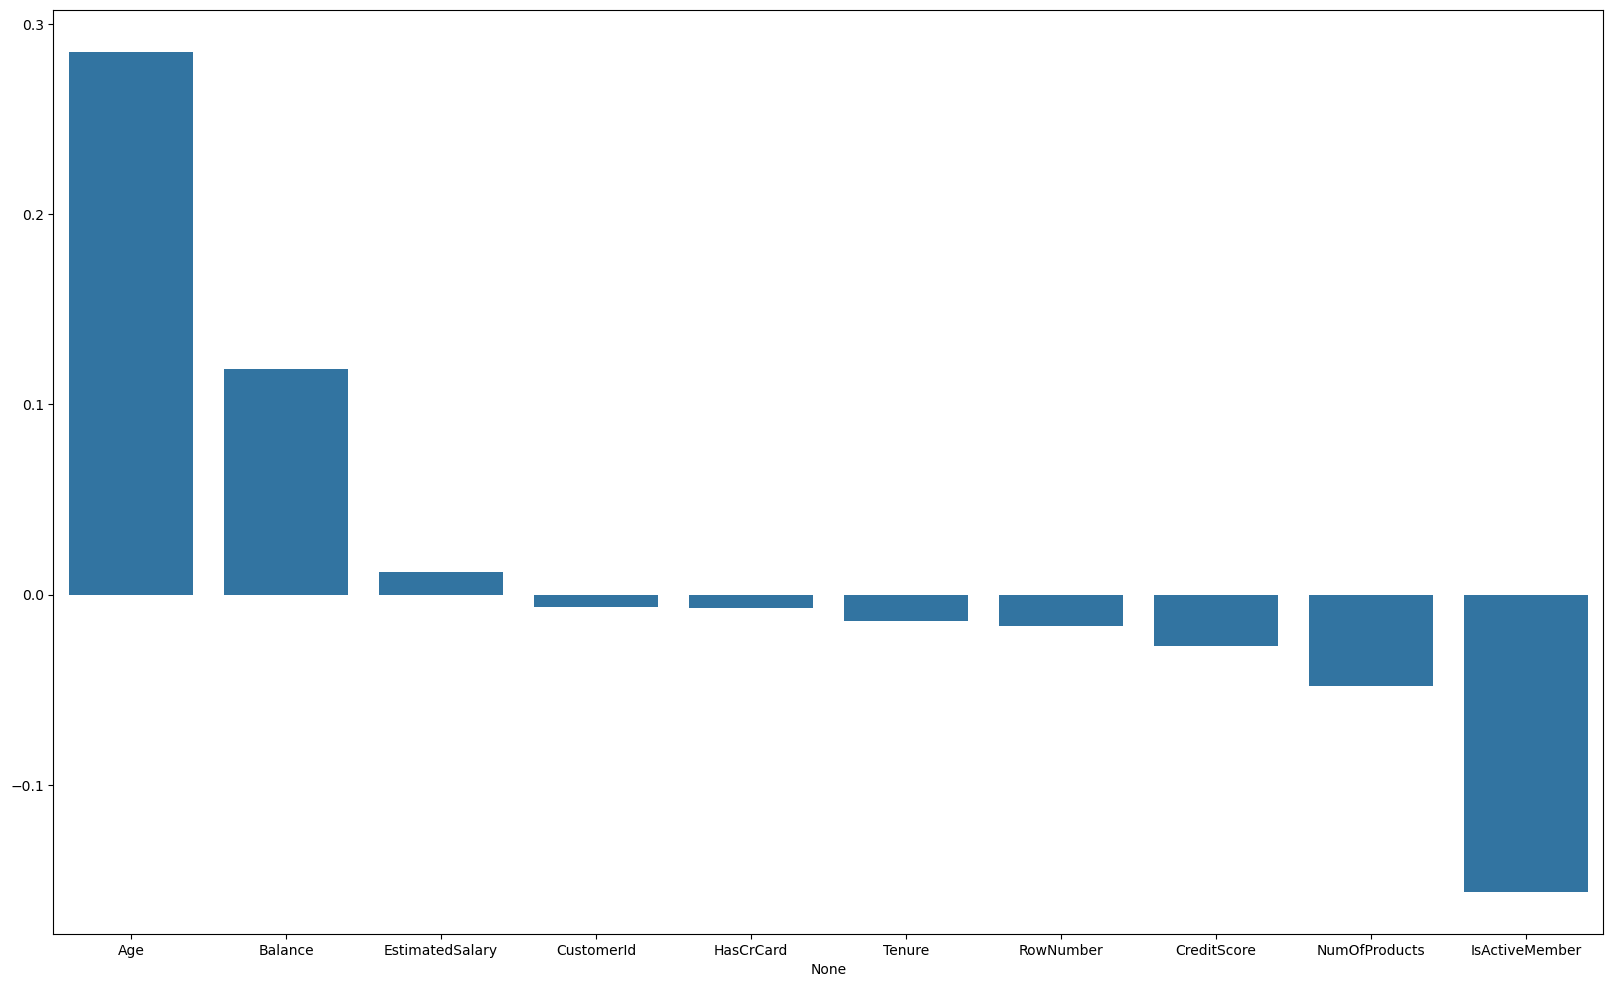

In [28]:
plt.figure(figsize=(20,12))
sns.barplot(x = features.index, y =features.values)
plt.show()

In [33]:
# data visualization

In [34]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Exited
0    7963
1    2037
Name: count, dtype: int64


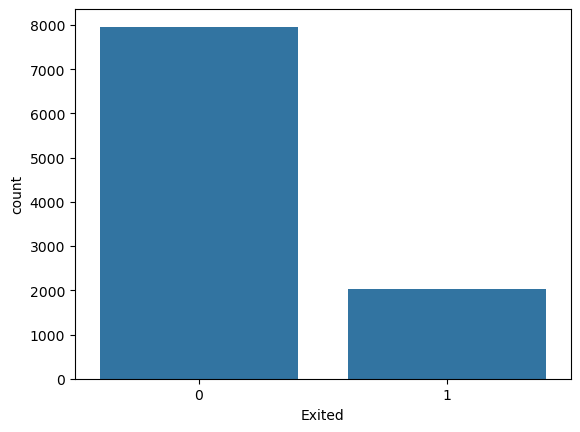

In [35]:
print(df['Exited'].value_counts())

sns.countplot(x='Exited', data = df)
plt.show()

Gender
Male      5457
Female    4543
Name: count, dtype: int64


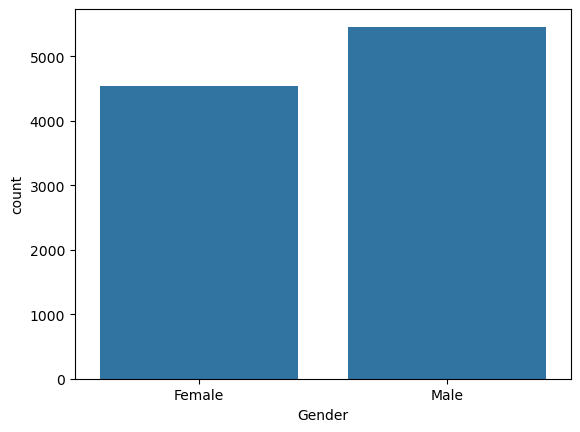

In [36]:
print(df['Gender'].value_counts())

sns.countplot(x='Gender', data = df)
plt.show()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64


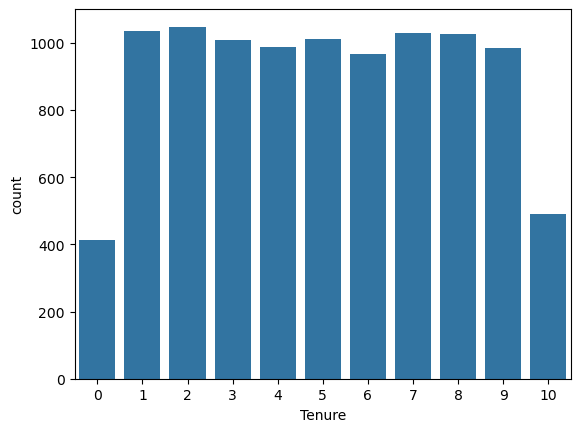

In [37]:
print(df['Tenure'].value_counts())

sns.countplot(x='Tenure', data = df)
plt.show()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64


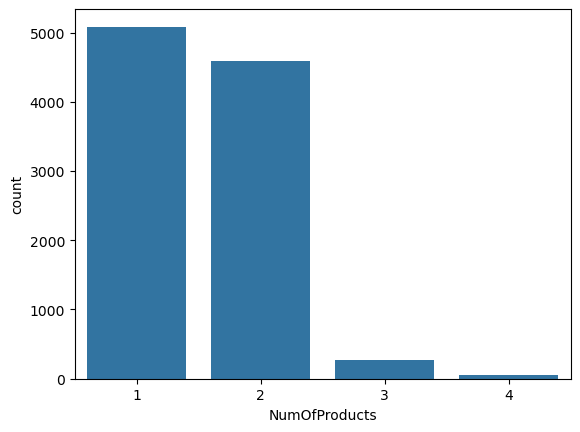

In [38]:
print(df['NumOfProducts'].value_counts())

sns.countplot(x='NumOfProducts', data = df)
plt.show()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64


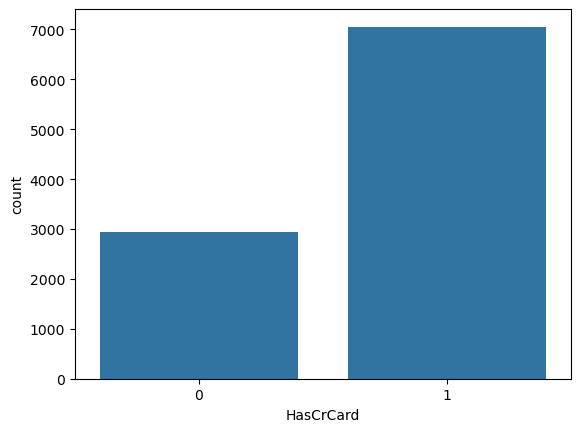

In [40]:
print(df['HasCrCard'].value_counts())

sns.countplot(x='HasCrCard', data = df)
plt.show()

In [41]:
# Finding Relations

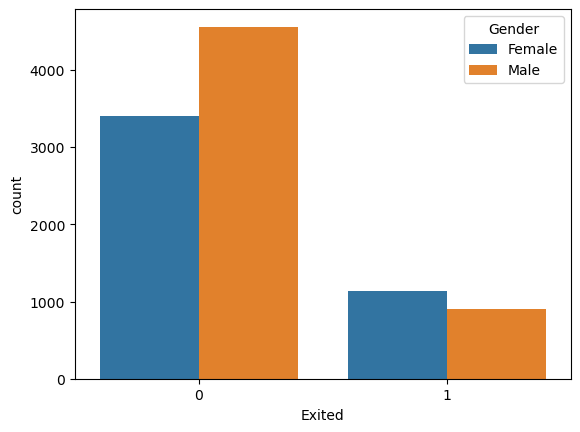

In [42]:
sns.countplot(x='Exited', data = df, hue= 'Gender')
plt.show()

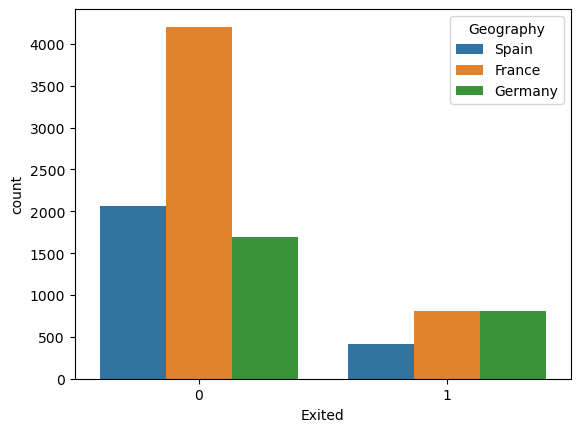

In [43]:

sns.countplot(x='Exited', data = df, hue= 'Geography')
plt.show()

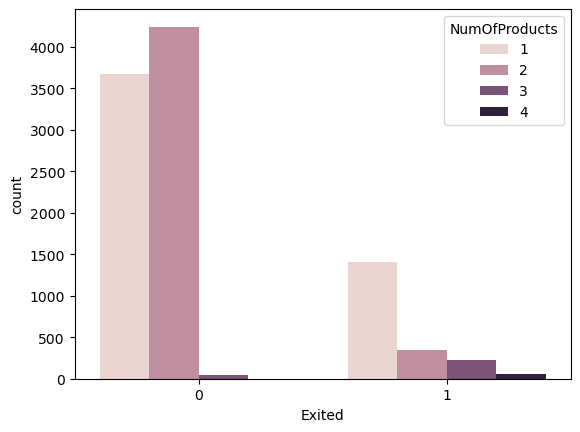

In [44]:
sns.countplot(x='Exited', data = df, hue= 'NumOfProducts')
plt.show()

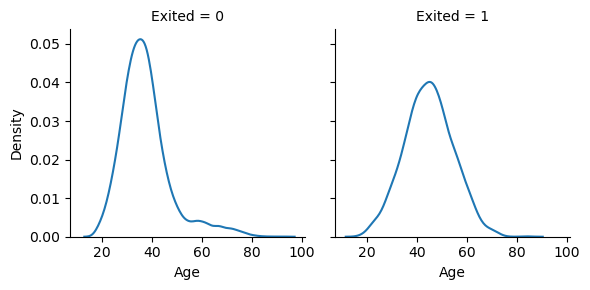

In [49]:
sns.FacetGrid(df, col='Exited')\
    .map(sns.kdeplot,  "Age")      # use sns.histplot for histrogram 

plt.show()

In [50]:
# Data Preprocessing

In [51]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [52]:
df.drop(columns=['RowNumber', "CustomerId", "Surname"], inplace=True)

In [53]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [54]:
df['Geography'] = df['Geography'].astype('category').cat.codes

In [55]:
df['Gender'] = np.where(df['Gender']=='Male', 1, 0)

In [56]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [57]:
X = df.drop(columns = ['Exited']).values
y = df['Exited'].values

In [58]:
X.shape

(10000, 10)

In [59]:
y.shape

(10000,)

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [62]:
# Model Building

In [63]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

In [65]:
pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/150.0 MB 1.7 MB/s eta 0:01:31
   ---------------------------------------- 0.4/150.0 MB 3.8 MB/s eta 0:00:40
   ---------------------------------------- 0.8/150.0 MB 5.3 MB/s eta 0:00:29
   ---------------------------------------- 1.3/150.0 MB 6.3 MB/s eta 0:00:24
   ---------------------------------------- 1.8/150.0 MB 7.3 MB/s eta 0:00:21
    --------------------------------------- 2.3/150.0 MB 7.7 MB/s eta 0:00:20
    --------------------------------------- 3.0/150.0 MB 8.7 MB/s eta 0:00:17
    --------------------------------------- 3.7/150.0 MB 9.5 MB/s eta 0:00:16
   - -------------------------------------- 4.6/150.0 MB 10.5 MB/s eta 0:00:14
   - -------------------------------------- 5.4/150.0 MB 11.6 MB/s eta 0:00:13
   - -------------------------------------- 6.6/150.0 MB 12.8 MB/s eta 0:00:

In [67]:
from xgboost import XGBClassifier

In [68]:
basic_model = XGBClassifier()
basic_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [69]:
def evaluate_model(model):
    print("Training accuracy:", model.score(X_train, y_train))
    print("Testing accuracy:", model.score(X_test, y_test))

    y_pred = model.predict(X_test)

    print(confusion_matrix(y_test, y_pred))

    print(classification_report(y_test, y_pred))

    print("F1 score:", f1_score(y_test, y_pred))
     

In [70]:
evaluate_model(basic_model)

Training accuracy: 0.9644776119402985
Testing accuracy: 0.8563636363636363
[[2499  158]
 [ 316  327]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      2657
           1       0.67      0.51      0.58       643

    accuracy                           0.86      3300
   macro avg       0.78      0.72      0.75      3300
weighted avg       0.85      0.86      0.85      3300

F1 score: 0.5797872340425532


In [71]:
# Hyperparameter Tuning

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
xgb_params = {
    'n_estimators' : [100, 200],
    'max_depth' : [4,5]
}

In [74]:
grid = GridSearchCV(XGBClassifier(), param_grid=xgb_params, scoring='accuracy', cv=10)
grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'max_depth': [4, 5], 'n_estimators': [100, 200]},
             scoring='accuracy')

In [75]:
print("Best score", grid.best_score_)

Best score 0.8513432835820895


In [76]:
print("Best score", grid.best_params_)

Best score {'max_depth': 4, 'n_estimators': 100}


In [77]:
model_1 = XGBClassifier(max_depth=4)
model_1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [78]:
evaluate_model(model_1)

Training accuracy: 0.9056716417910448
Testing accuracy: 0.8681818181818182
[[2544  113]
 [ 322  321]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      2657
           1       0.74      0.50      0.60       643

    accuracy                           0.87      3300
   macro avg       0.81      0.73      0.76      3300
weighted avg       0.86      0.87      0.86      3300

F1 score: 0.596100278551532


In [79]:
350+85

435

In [80]:
from sklearn.ensemble import GradientBoostingClassifier

In [81]:
model_2 = GradientBoostingClassifier(n_estimators=500)
model_2.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=500)

In [82]:
evaluate_model(model_2)

Training accuracy: 0.9073134328358209
Testing accuracy: 0.8693939393939394
[[2546  111]
 [ 320  323]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      2657
           1       0.74      0.50      0.60       643

    accuracy                           0.87      3300
   macro avg       0.82      0.73      0.76      3300
weighted avg       0.86      0.87      0.86      3300

F1 score: 0.5998142989786444
